<a href="https://colab.research.google.com/github/ashdiqqi/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image


In [4]:
def convultion2d(image, kernel, padding=0, stride=1):
    # Grayscale conversion if not already grayscale
    if len(image.shape) == 3:  # If image has 3 channels (i.e., color image)
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Get dimensions of the input image and kernel
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Add padding
    padded_image = np.pad(image, padding, mode='constant')

    # Output image dimensions
    output_h = int((img_h - kernel_h + 2 * padding) / stride) + 1
    output_w = int((img_w - kernel_w + 2 * padding) / stride) + 1
# Initialize output image
    output = np.zeros((output_h, output_w))
# Apply convolution
    for y in range(0, output_h):
        for x in range(0, output_w):
            # Extract region of interest
            roi = padded_image[y*stride:y*stride+kernel_h, x*stride:x*stride+kernel_w]
            output[y, x] = np.sum(roi * kernel)

    # Normalize and convert to uint8 for displaying
    output = np.clip(output, 0, 255)
    output = output.astype(np.uint8)

    # Display output
    cv2_imshow(output)


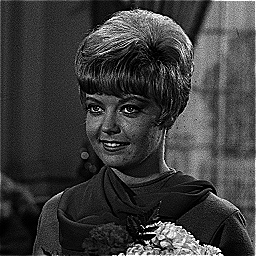

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Image sharpen kernel
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply convolution if image is successfully loaded
if img is not None:
    convultion2d(img, kernel_sharpen, padding=1, stride=1)


1. Sharpen

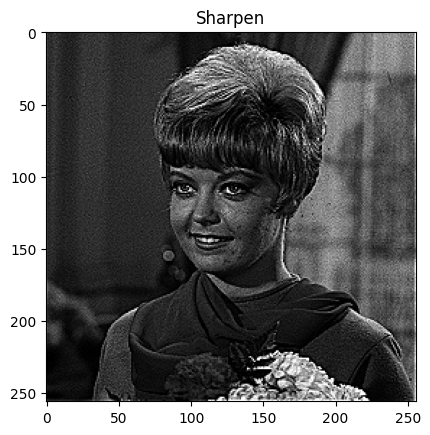

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Image sharpen kernel
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

if img is not None:
    output_image = convultion2d(img, kernel_sharpen, padding=1, stride=1)

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.title('Sharpen')
        plt.imshow(output_image, cmap='gray')
        plt.show()

2. Emboss

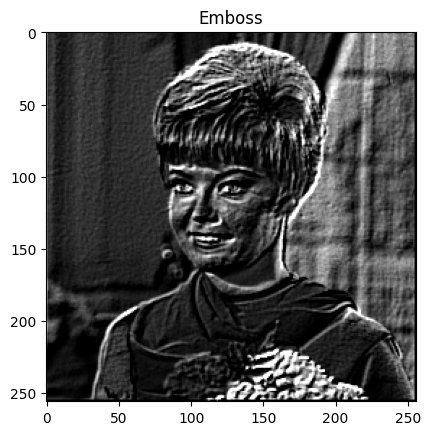

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Emboss kernel
kernel_emboss = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])

# Apply convolution if image is successfully loaded
if img is not None:
    output_image = convultion2d(img, kernel_emboss, padding=1, stride=1)

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.imshow(output_image, cmap='gray')
        plt.title('Emboss')
        plt.show()

3. Left Sobel Edge Detection

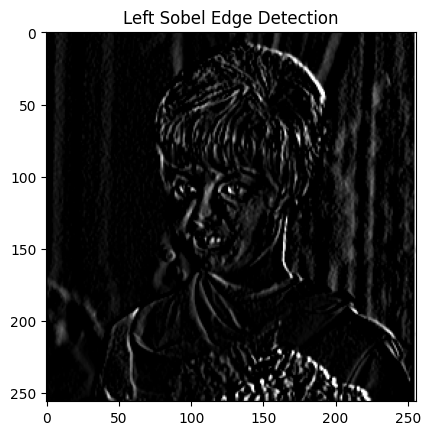

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Left Sobel kernel for edge detection
kernel_sobel_left = np.array([[ 1,  0, -1],
                              [ 2,  0, -2],
                              [ 1,  0, -1]])

# Apply convolution if image is successfully loaded
if img is not None:
    output_image = convultion2d(img, kernel_sobel_left, padding=1, stride=1)

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.imshow(output_image, cmap='gray')
        plt.title('Left Sobel Edge Detection')  # Hide axis
        plt.show()

4. Canny Edge Detection

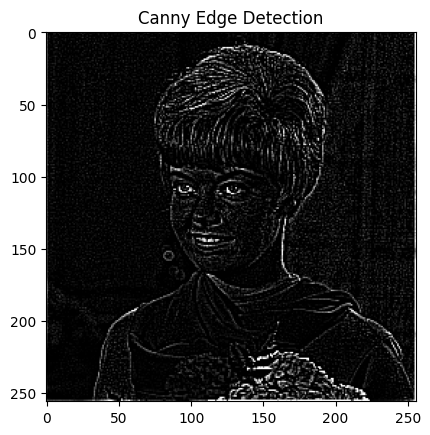

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Left Sobel kernel for edge detection
kernel_canny = np.array([[ -1,  -1, -1],
                         [ -1,  8, -1],
                         [ -1,  -1, -1]])

# Apply convolution if image is successfully loaded
if img is not None:
    output_image = convultion2d(img, kernel_canny, padding=1, stride=1)

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.imshow(output_image, cmap='gray')
        plt.title('Canny Edge Detection')
        plt.show()

5. Prewitt
Edge
Detection

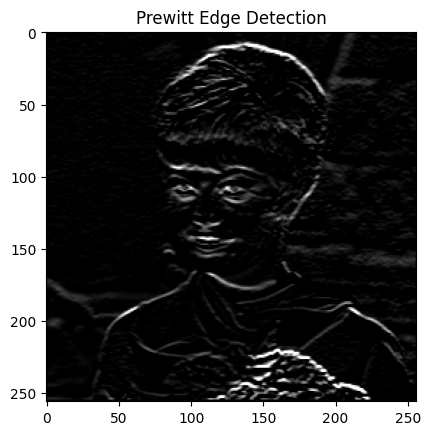

In [ ]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Left Sobel kernel for edge detection
kernel_prewitt = np.array([[ -1,  -1, -1],
                         [ 0,  0, 0],
                         [ 1,  1, 1]])

# Apply convolution if image is successfully loaded
if img is not None:
    output_image = convultion2d(img, kernel_prewitt, padding=1, stride=1)

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.imshow(output_image, cmap='gray')
        plt.title('Prewitt Edge Detection')
        plt.show()

6. 5x5 Gaussian Blur

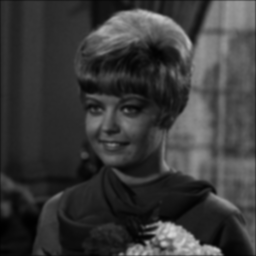

In [9]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Gaussian blur kernel 5x5
kernel_gaussian = (1/256) * np.array([[ 1,  4,  6,  4,  1],
                                      [ 4, 16, 24, 16,  4],
                                      [ 6, 24, 36, 24,  6],
                                      [ 4, 16, 24, 16,  4],
                                      [ 1,  4,  6,  4,  1]])

# Apply convolution if image is successfully loaded
if img is not None:
    output_image = convultion2d(img, kernel_gaussian, padding=2, stride=1)  # Padding 2 for 5x5 kernel

    # Check if convolution returned a valid output
    if output_image is not None:
        # Display result using matplotlib
        plt.imshow(output_image, cmap='gray')
        plt.title('5x5 Gaussian Blur')
        plt.show()

7. 21x21 Gaussian Blur

In [7]:
def gaussian_blur_21x21(image, kernel_size):
    # Calculate sigma based on the kernel size
    sigma = math.sqrt(kernel_size)

    # Create a 1D Gaussian kernel using OpenCV
    gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)

    # Create a 2D Gaussian kernel by multiplying the 1D kernel with its transpose
    gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

    # Apply convolution (Gaussian Blur) using the 2D Gaussian kernel
    blurred_image = cv.filter2D(image, -1, gaussian_kernel_2d)

    return blurred_image

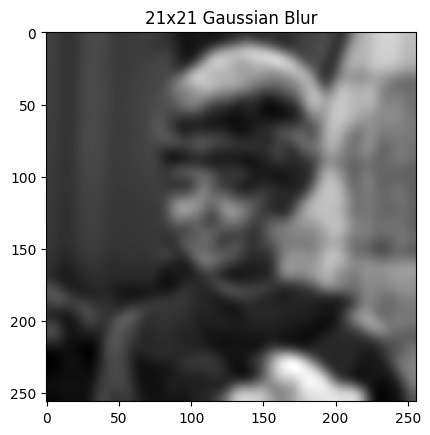

In [8]:
# Load image
img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')  # Update the path as per your drive structure

# Check if the image was loaded
if img is None:
    print("Error: Image file not found or path is incorrect.")

# Apply Gaussian Blur if image is successfully loaded
if img is not None:
    # Convert the image to grayscale for simplicity
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Apply 21x21 Gaussian blur
    output_image = gaussian_blur_21x21(img_gray, kernel_size=21)

    # Display the result using matplotlib
    plt.imshow(output_image, cmap='gray')
    plt.title('21x21 Gaussian Blur')
    plt.show()